In [1]:
# original data in data_original/image 
# processed data will be in train/ val/ and test/
import os
# tqdm for notebook
from tqdm import tqdm

from glob import glob

# read all dataset file names:
image_files = glob("data_original/image/*")
mask_files = glob("data_original/mask/*")

print(f"Total images found: {len(image_files)}")
print(f"Total masks found: {len(mask_files)}")


Total images found: 5240
Total masks found: 5240


In [2]:
# assert that names are matching 1 to 1
assert len(image_files) == len(mask_files), "Number of images and masks do not match"
image_basenames = set([os.path.basename(f).split('.')[0] for f in image_files])
mask_basenames = set([os.path.basename(f).split('.')[0] for f in mask_files])
assert image_basenames == mask_basenames, "Image and mask filenames do not match"

for fname in tqdm(image_basenames):
    img_path = f"data_original/image/{fname}.png"
    mask_path = f"data_original/mask/{fname}.png"
    
    # Simple check to ensure files exist
    assert os.path.exists(img_path), f"Image file missing: {img_path}"
    assert os.path.exists(mask_path), f"Mask file missing: {mask_path}"

100%|██████████| 5240/5240 [00:20<00:00, 256.52it/s]


In [3]:
# print all patient ids
print("All patient IDs:")
ids = set()
for fname in sorted(image_basenames):
    patient_id = fname.split('-')[0]
    ids.add(patient_id)
ids = sorted(list(ids))
print(ids)
print(f"Total unique patients: {len(ids)}")

All patient IDs:
['004', '006', '007', '040', '042', '047', '055', '057', '068', '075', '090', '094', '105', '117', '129', '141', '160', '163', '170', '175', '180', '188', '191', '196', '199', '238', '241', '260', '267', '275', '277', '290', '305', '308', '312', '315', '317', '320', '323', '324', '325', '350', '366', '375', '383', '386', '387', '389', '391', '392', '400', '414', '424', '426', '437', '438', '441', '443', '490', '495', '502', '531', '550', '570', '572', '605', '612', '661', '666', '673', '686', '692', '699', '718', '743', '744', '747', '752', '778', '789', '790', '807', '822', '832', '837', '840', '841', '842', '844', '845', '852', '863', '865', '881', '886', '890', '900', '918', '919', '943', '945', '948', '975', '977', '987', '989', '990']
Total unique patients: 107


In [4]:
# how many images per patient?
for pid in ids:
    count = sum(1 for fname in image_basenames if fname.startswith(pid + '-'))
    print(f"Patient {pid} has {count} images.")

Patient 004 has 49 images.
Patient 006 has 49 images.
Patient 007 has 49 images.
Patient 040 has 49 images.
Patient 042 has 49 images.
Patient 047 has 49 images.
Patient 055 has 49 images.
Patient 057 has 49 images.
Patient 068 has 49 images.
Patient 075 has 49 images.
Patient 090 has 49 images.
Patient 094 has 49 images.
Patient 105 has 49 images.
Patient 117 has 49 images.
Patient 129 has 49 images.
Patient 141 has 49 images.
Patient 160 has 49 images.
Patient 163 has 49 images.
Patient 170 has 49 images.
Patient 175 has 49 images.
Patient 180 has 49 images.
Patient 188 has 49 images.
Patient 191 has 49 images.
Patient 196 has 49 images.
Patient 199 has 49 images.
Patient 238 has 49 images.
Patient 241 has 49 images.
Patient 260 has 49 images.
Patient 267 has 49 images.
Patient 275 has 49 images.
Patient 277 has 49 images.
Patient 290 has 49 images.
Patient 305 has 49 images.
Patient 308 has 49 images.
Patient 312 has 49 images.
Patient 315 has 49 images.
Patient 317 has 49 images.
P

In [5]:
train_ids = ids[0:75]  # First 75 patients for training
val_ids = ids[75:86]  # Next 11 patients for validation
test_ids = ids[86:]   # Last 21 patients for testing

train_imgs = 0
val_imgs = 0
test_imgs = 0

for fname in tqdm(image_basenames):
    patient_id = fname.split('-')[0]
    img_path = f"data_original/image/{fname}.png"
    mask_path = f"data_original/mask/{fname}.png"
    
    if patient_id in train_ids:
        train_imgs += 1
    elif patient_id in val_ids:
        val_imgs += 1
    elif patient_id in test_ids:
        test_imgs += 1

print(f"Total training images: {train_imgs}")
print(f"Total validation images: {val_imgs}")
print(f"Total testing images: {test_imgs}")

100%|██████████| 5240/5240 [00:00<00:00, 238398.03it/s]

Total training images: 3672
Total validation images: 539
Total testing images: 1029


In [6]:
# create directories if not exist
os.makedirs("train/image", exist_ok=True)
os.makedirs("train/mask", exist_ok=True)
os.makedirs("val/image", exist_ok=True)
os.makedirs("val/mask", exist_ok=True)
os.makedirs("test/image", exist_ok=True)
os.makedirs("test/mask", exist_ok=True)

for fname in tqdm(image_basenames):
    patient_id = fname.split('-')[0]
    img_path = f"data_original/image/{fname}.png"
    mask_path = f"data_original/mask/{fname}.png"
    
    if patient_id in train_ids:
        dest_img_path = f"train/image/{fname}.png"
        dest_mask_path = f"train/mask/{fname}.png"
    elif patient_id in val_ids:
        dest_img_path = f"val/image/{fname}.png"
        dest_mask_path = f"val/mask/{fname}.png"
    elif patient_id in test_ids:
        dest_img_path = f"test/image/{fname}.png"
        dest_mask_path = f"test/mask/{fname}.png"
    
    # copy files
    os.system(f"cp {img_path} {dest_img_path}")
    os.system(f"cp {mask_path} {dest_mask_path}")

print("Data split completed.")

100%|██████████| 5240/5240 [04:52<00:00, 17.91it/s]

Data split completed.


# Calculate normalization parameters from train dataset:

0it [00:00, ?it/s]

(718, 253)


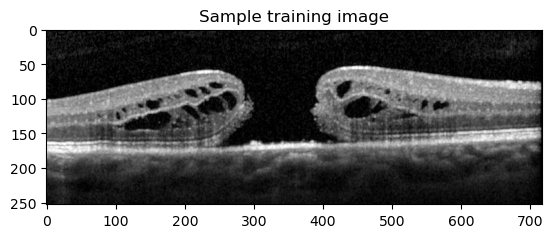

3672it [03:32, 17.28it/s]


Training data mean: 54.76707466898142, std: 57.55662815500704


In [6]:
# read all data and calculate normalization stats
import numpy as np
from PIL import Image
import os
from glob import glob
import matplotlib.pyplot as plt


image_files = glob("train/image/*")
all_pixels = []
for i, img_file in tqdm(enumerate(image_files)):
    img = Image.open(img_file).convert('L')  # convert to grayscale
    img_array = np.array(img).flatten()
    all_pixels.extend(img_array)
    if i==0:
        print(img.size)
        # plot first image
        plt.imshow(img_array.reshape(img.size[1], img.size[0]), cmap='gray')
        plt.title("Sample training image")
        plt.show()
all_pixels = np.array(all_pixels)
mean = np.mean(all_pixels)
std = np.std(all_pixels)
print(f"Training data mean: {mean/255:.4f}, std: {std/255:.4f}")


In [1]:
from transformation import ELM_transform_gray
from dataset import BasicDataset, D3Dataset
from torch.utils.data import DataLoader

#------------- Load the images from directory----------
train_dir_img = './train/image/'
train_dir_mask = './train/mask/'
val_dir_img = './val/image/'
val_dir_mask = './val/mask/'
dir_checkpoint = './checkpoint/'
# ------------------Loading END ------------------------

n_classes =1
n_channels = 1
epochs=15
batch_size=4
lr=0.0001
val_percent=0.1
save_cp=True
img_scale=1
   
transform = ELM_transform_gray()
train_dataset = BasicDataset(train_dir_img, train_dir_mask, img_scale,transform = transform['train'], single_channel=False)
train_dataset_grey = BasicDataset(train_dir_img, train_dir_mask, img_scale,transform = transform['train'], single_channel=True)

n_train=len(train_dataset)
n_train_grey=len(train_dataset_grey)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
train_loader_grey = DataLoader(train_dataset_grey, batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)

for batch1, batch2 in zip(train_loader, train_loader_grey):
    imgs, true_masks = batch1['image'], batch1['mask']
    imgs_grey, true_masks_grey = batch2['image'], batch2['mask']
    print(imgs.shape, imgs_grey.shape)  
    break

/home/s2036401/miniconda3/envs/elm-gpu/lib/python3.9/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])


In [1]:
from dataset import D3Dataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from transformation import ELM_transform_gray

#------------- Load the images from directory----------
train_dir_img = './train/image/'
train_dir_mask = './train/mask/'
val_dir_img = './val/image/'
val_dir_mask = './val/mask/'
dir_checkpoint = './checkpoint/'
# ------------------Loading END ------------------------

transform = ELM_transform_gray()
d3dataset = D3Dataset(
        imgs_dir=train_dir_img,
        masks_dir=train_dir_mask,
        scale=1,
        transform=transform['train']
)
d3loader = DataLoader(d3dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=False)
for batch in d3loader:
    imgs, true_masks = batch['image'], batch['mask']
    print(imgs.shape)  


torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])


torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size

torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])
torch.Size([1, 49, 256, 256])


75
torch.Size([1, 49, 256, 256])


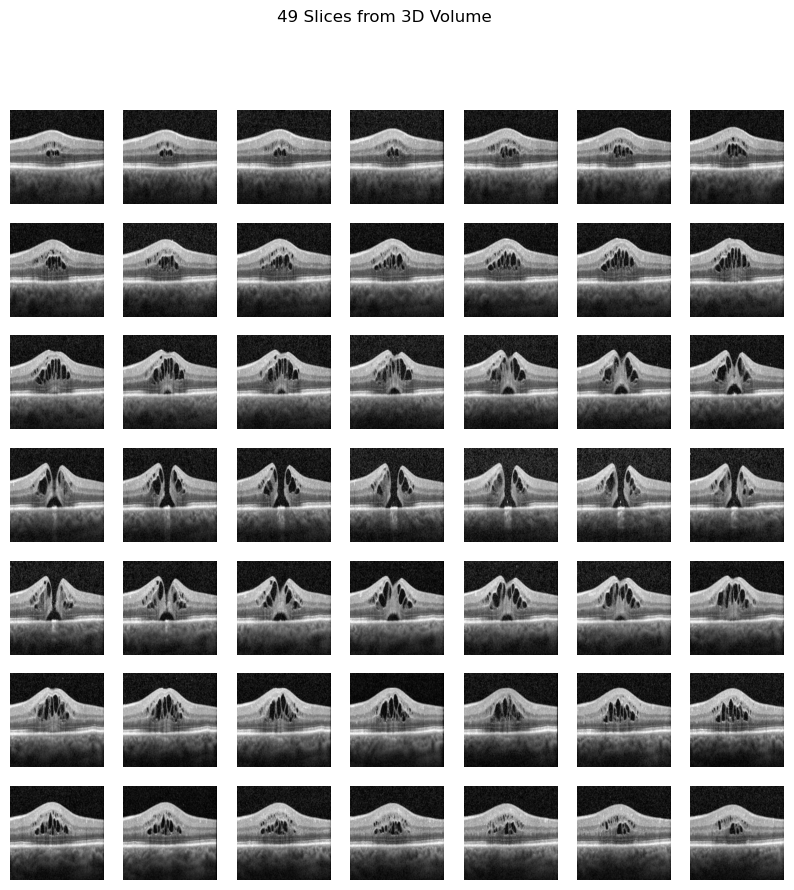

In [2]:
# print dataset size
print(d3dataset.__len__())
print(imgs.shape)
# plot the 49 slices
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i in range(7):
    for j in range(7):
        axes[i, j].imshow(imgs[0, i*7 + j, :, :].squeeze(), cmap='gray')
        axes[i, j].axis('off')
plt.suptitle("49 Slices from 3D Volume")
plt.show()

torch.Size([1, 49, 256, 256])


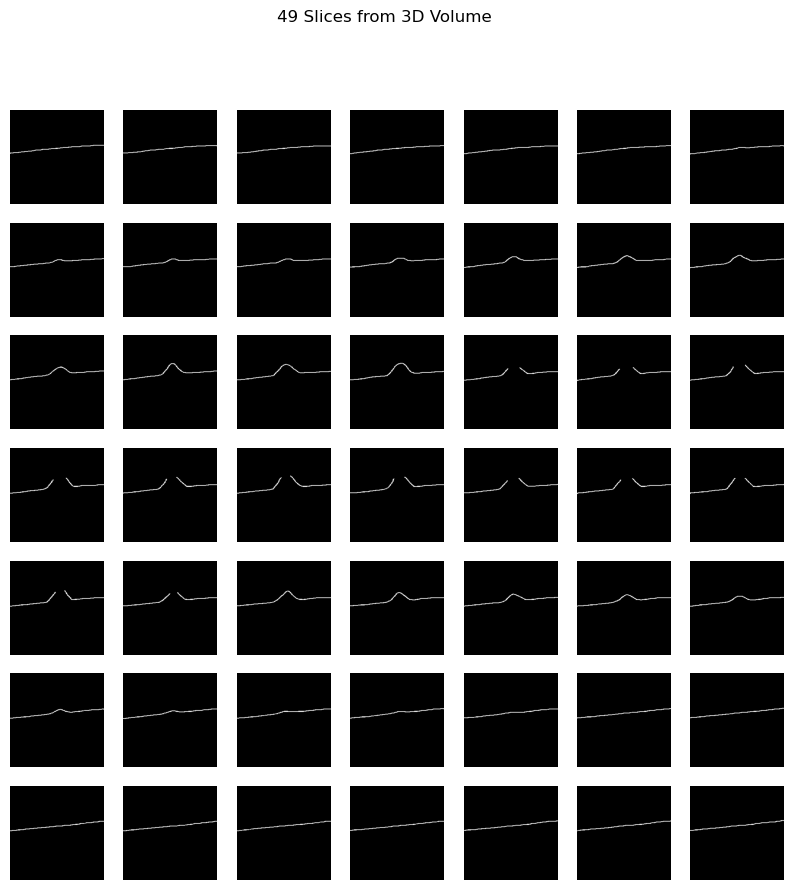

In [13]:
print(true_masks.shape)
# plot the 49 slices
fig, axes = plt.subplots(7, 7, figsize=(10, 10))
for i in range(7):
    for j in range(7):
        axes[i, j].imshow(true_masks[0, i*7 + j, :, :].squeeze(), cmap='gray')
        axes[i, j].axis('off')
plt.suptitle("49 Slices from 3D Volume")
plt.show()

In [ ]:
from model import UNet3D
import torch

model = UNet3D(1,1)
x = torch.randn(2,1,49,256,256)  # batch of 2
out = model(x)
print(out.shape)  # should print: torch.Size([2, 1, 49, 256, 256])

torch.Size([2, 1, 49, 256, 256])
